In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics import tsaplots
from pylab import rcParams
import statsmodels.api as sm

Index(['Unnamed: 0', 'CO2', 'adjusted CO2'], dtype='object')


<Figure size 792x648 with 0 Axes>

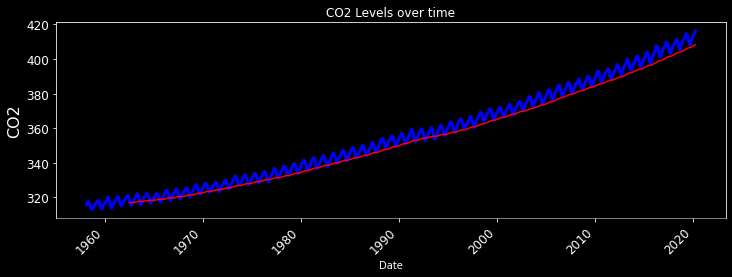

In [15]:
#df=pd.read_csv('https://raw.githubusercontent.com/vega/vega/master/docs/data/co2-concentration.csv')
#df.to_csv('co2-concentration.csv')
df=pd.read_csv('co2-concentration.csv',parse_dates=['Date'],index_col='Date')
print(df.columns)
plt.clf()
fig,ax = plt.subplots(figsize=(12,4))

co2_levels_mean = df.rolling(window=52)['CO2'].mean()

df['CO2'].plot(ax=ax, color='blue',linewidth=3, fontsize=12)
co2_levels_mean.plot(ax=ax, color='red')
#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.ylabel('CO2',fontsize=16)
plt.title('CO2 Levels over time')
ax.spines['bottom'].set_linewidth(0.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
#plt.style.use('ggplot')
plt.show()

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


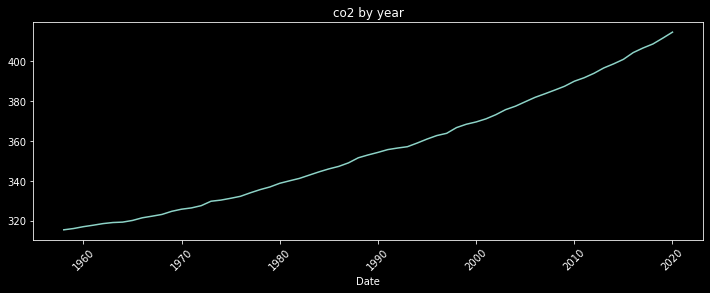

In [4]:
grouped=df.groupby(df.index.year)['CO2'].mean()
fig,ax = plt.subplots(figsize=(12,4))
grouped.plot(ax=ax)
plt.title('co2 by year')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.show()

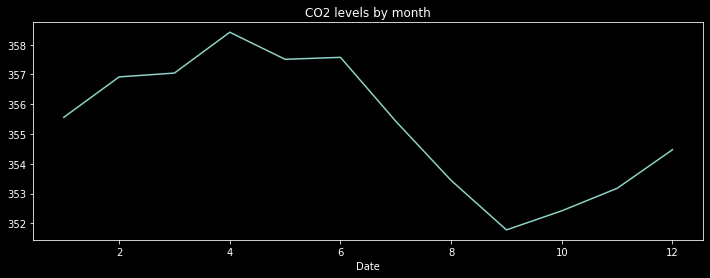

In [5]:
index_month = df.index.month
co2_levels_by_month = df.groupby(index_month)['CO2'].mean()
fig,ax = plt.subplots(figsize=(12,4))
co2_levels_by_month.plot(ax=ax)
plt.title('CO2 levels by month')
plt.show()

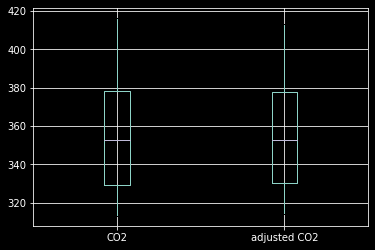

In [6]:
df[['CO2','adjusted CO2']].boxplot()
plt.show()

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


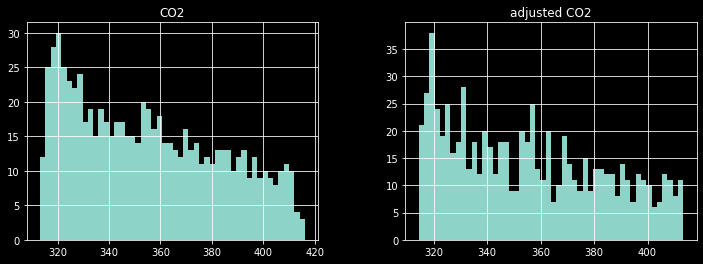

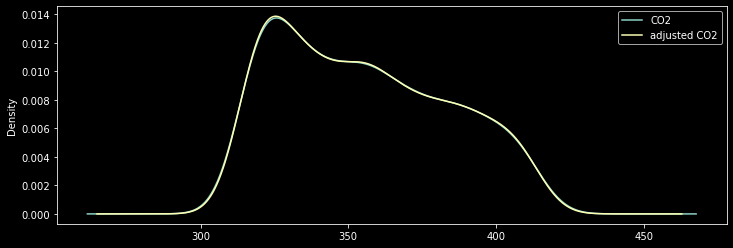

In [7]:
fig,ax = plt.subplots(figsize=(12,4))
df[['CO2','adjusted CO2']].hist(ax=ax, bins=50)
plt.show()
fig,ax = plt.subplots(figsize=(12,4))
df[['CO2','adjusted CO2']].plot(kind='density', ax=ax)
plt.show()

<Figure size 432x288 with 0 Axes>

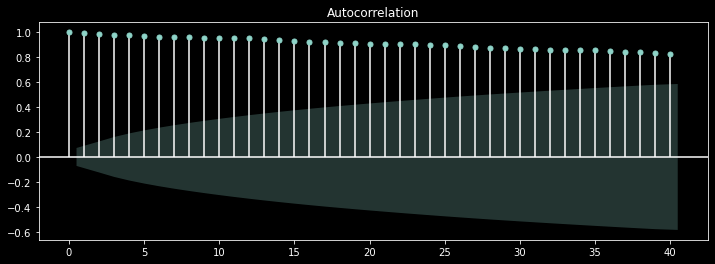

values close to 1 are showing strong positive correlation. The blue regions are showing areas of uncertainty


In [8]:
plt.clf()
fig,ax = plt.subplots(figsize=(12,4))
plt.style.use('seaborn-pastel')
fig = tsaplots.plot_acf(df['CO2'], lags=40,ax=ax)
plt.show()
print('values close to 1 are showing strong positive correlation. The blue regions are showing areas of uncertainty')

<Figure size 432x288 with 0 Axes>

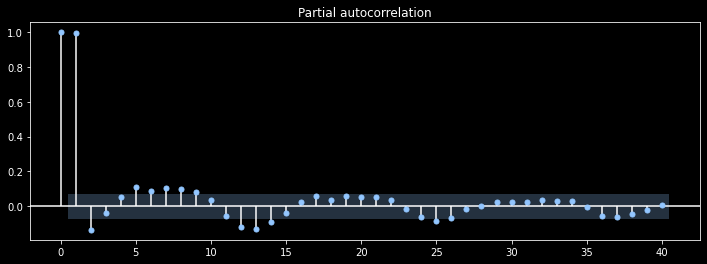

In [9]:
plt.clf()
fig,ax = plt.subplots(figsize=(12,4))
plt.style.use('seaborn-pastel')
fig = tsaplots.plot_pacf(df['CO2'], lags=40,ax=ax)
plt.title('Partial autocorrelation')
plt.show()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


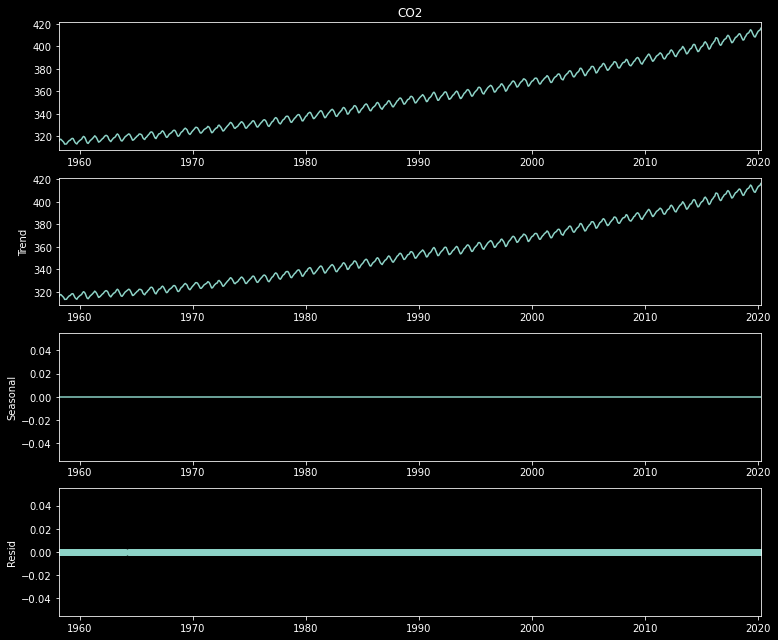

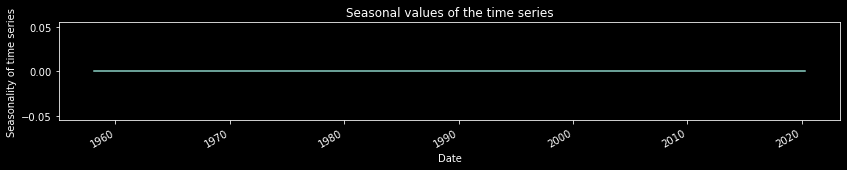

In [25]:
print(type(df.index))
rcParams['figure.figsize']=11,9
decomposition=sm.tsa.seasonal_decompose(x=df['CO2'],model='additive', extrapolate_trend='freq', period=1)
decomposition.plot()
plt.show()

decomposition_seasonal=decomposition.seasonal
ax= decomposition_seasonal.plot(figsize=(14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Seasonality of time series')
ax.set_title('Seasonal values of the time series')
plt.show()